
# Wine Quality - analyse,model and predict
___________________________________________________
* Aayush Malde (1911090)
* Aditya Malwade (1911091)
* Rahul Panchal (1911097)

In [ ]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv("winequality-red.csv", delimiter=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.shape

(1599, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
X=df[df.columns[0:11]].values
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

# Descriptive Analysis

In [ ]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.115796
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.297236
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.216894
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.045038
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.107343
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.061204
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.123445
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.152348
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.065394
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.202273


# Univariate Analysis

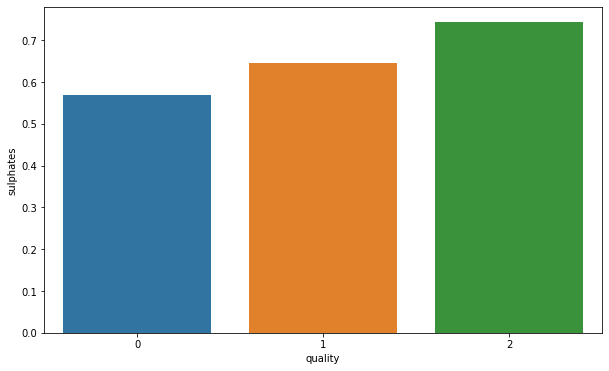

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df, ci=None)

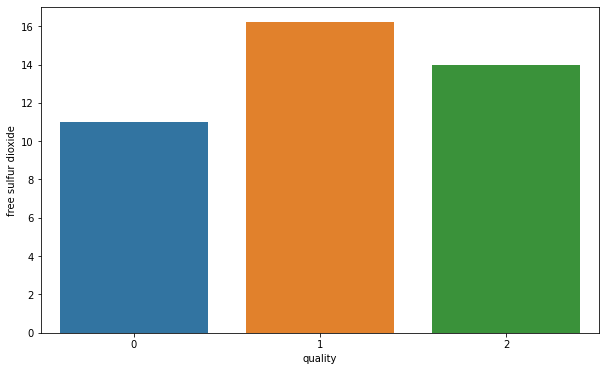

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df, ci=None)

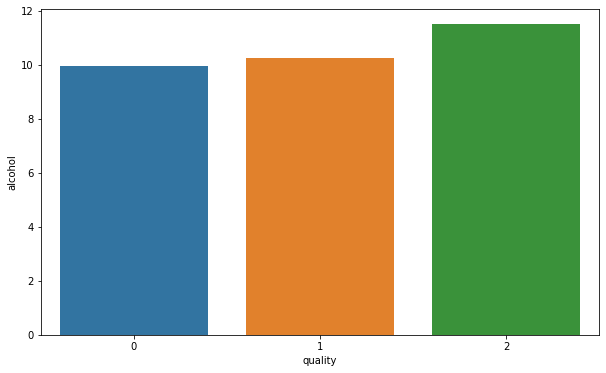

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = df, ci=None)

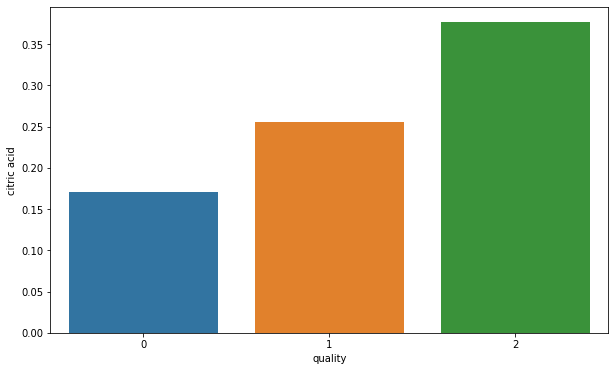

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df, ci=None)

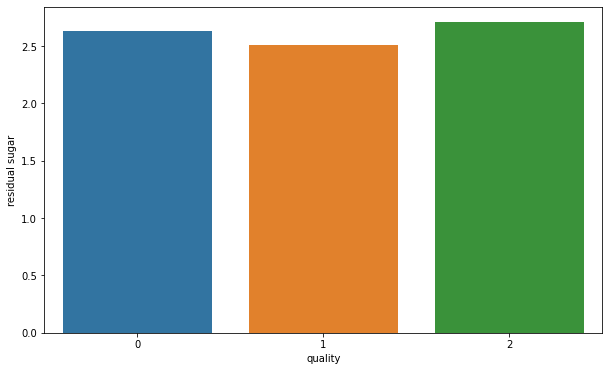

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = df, ci=None)

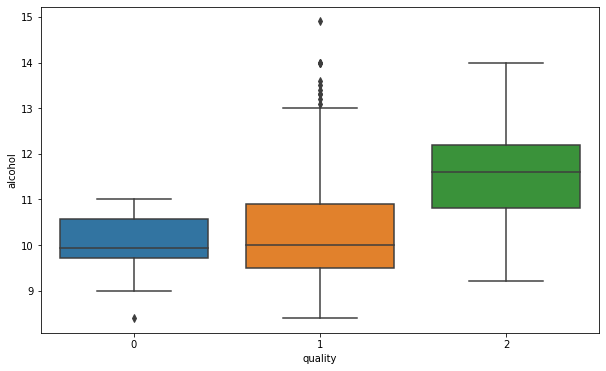

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'alcohol', data = df)

# Multivariate Analysis

In [ ]:
df['quality'] = df['quality'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


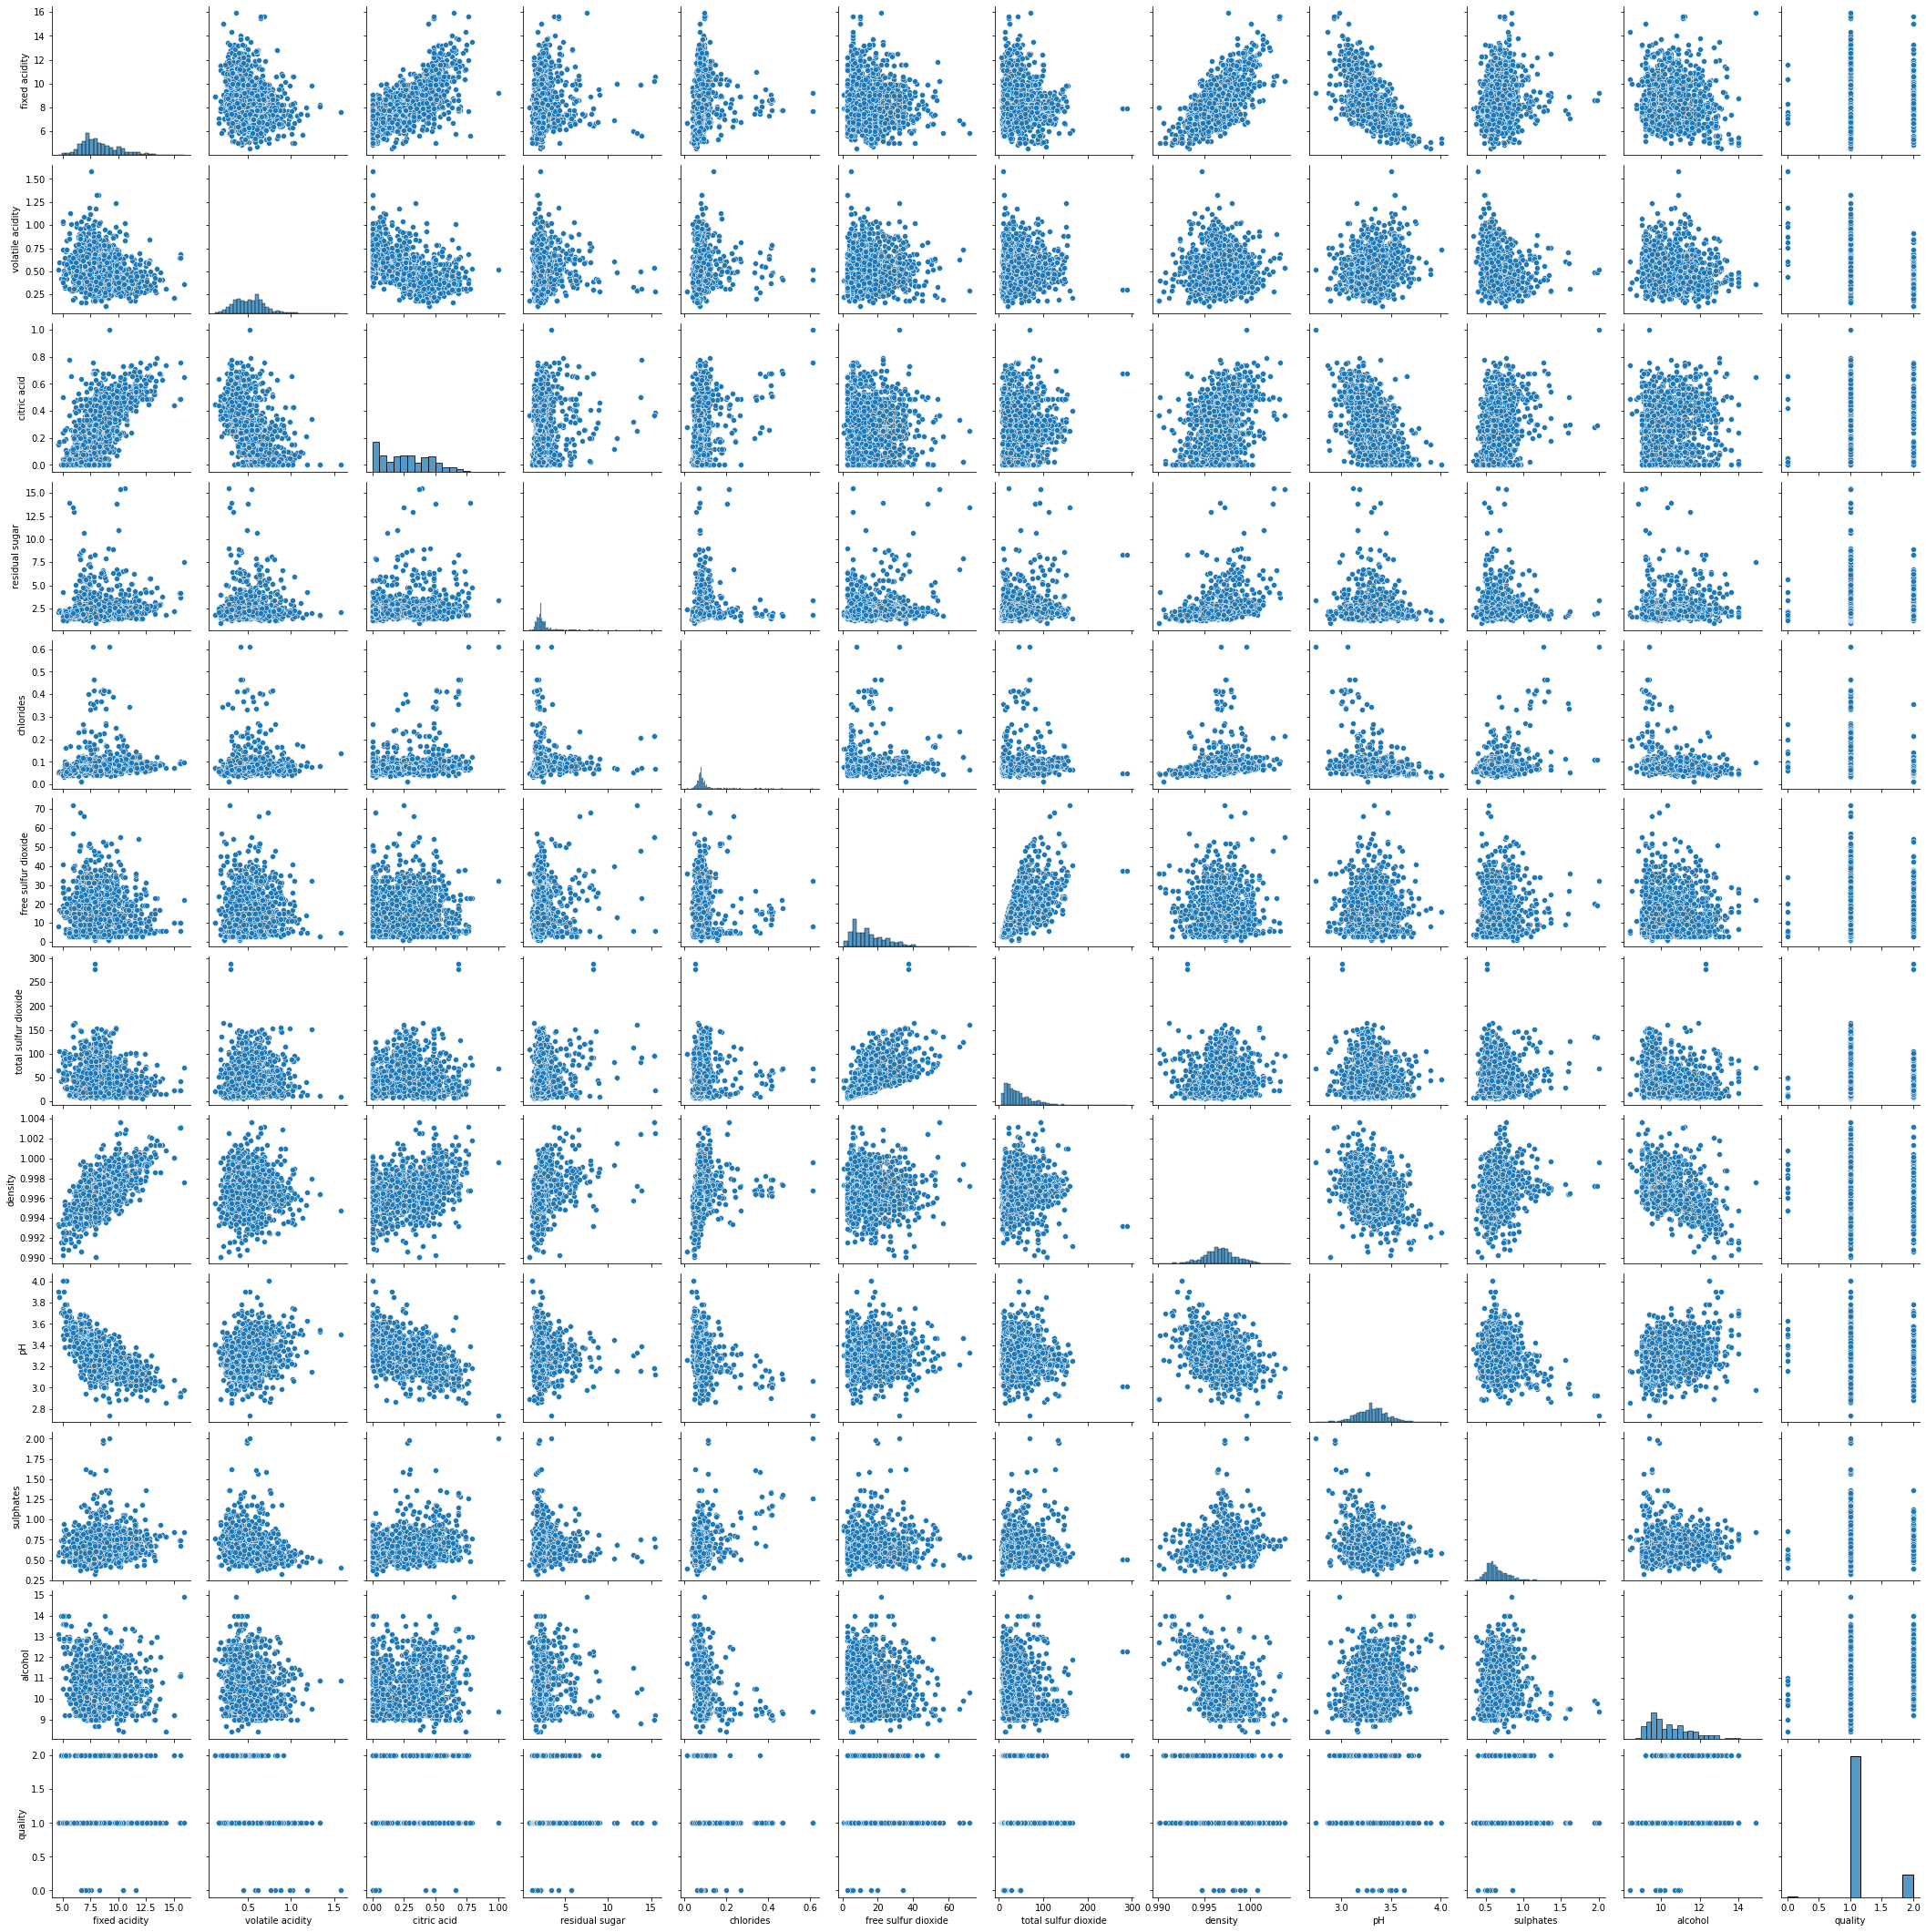

In [ ]:
sns.pairplot(df)

# Decision tree setup

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
bins = [0, 3.5, 6.5, 10]
labels = [0,1,2]
df['quality'] = pd.cut(df['quality'],bins=bins, labels=labels)


In [ ]:
y=df["quality"]
y

0       1
1       1
2       1
3       1
4       1
       ..
1594    1
1595    1
1596    1
1597    1
1598    1
Name: quality, Length: 1599, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [ ]:
sc = StandardScaler()
x = sc.fit_transform(X)

In [ ]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))
print('Shape of X test set {}'.format(X_testset.shape),'&',' Size of Y test set {}'.format(y_testset.shape))

Shape of X training set (1279, 11) &  Size of Y training set (1279,)
Shape of X test set (320, 11) &  Size of Y test set (320,)


In [ ]:
wT = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
wT 

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
trained_model = wT.fit(X_trainset,y_trainset)

In [ ]:
predTree = trained_model.predict(X_testset)

In [ ]:
print(predTree [0:10])
print(y_testset [0:10])

[1 1 1 1 1 1 1 1 1 1]
803     1
124     1
350     1
682     1
1326    1
976     1
1493    1
706     1
613     1
1587    1
Name: quality, dtype: category
Categories (3, int64): [0 < 1 < 2]


# Accuracy

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Accuracy of decision tree: ", metrics.accuracy_score(y_testset, predTree))

Accuracy of decision tree:  0.875


# Visualization

In [ ]:
wT.feature_importances_

array([0.03401104, 0.09104407, 0.        , 0.        , 0.        ,
       0.08499149, 0.09274894, 0.        , 0.02284277, 0.2485665 ,
       0.42579519])

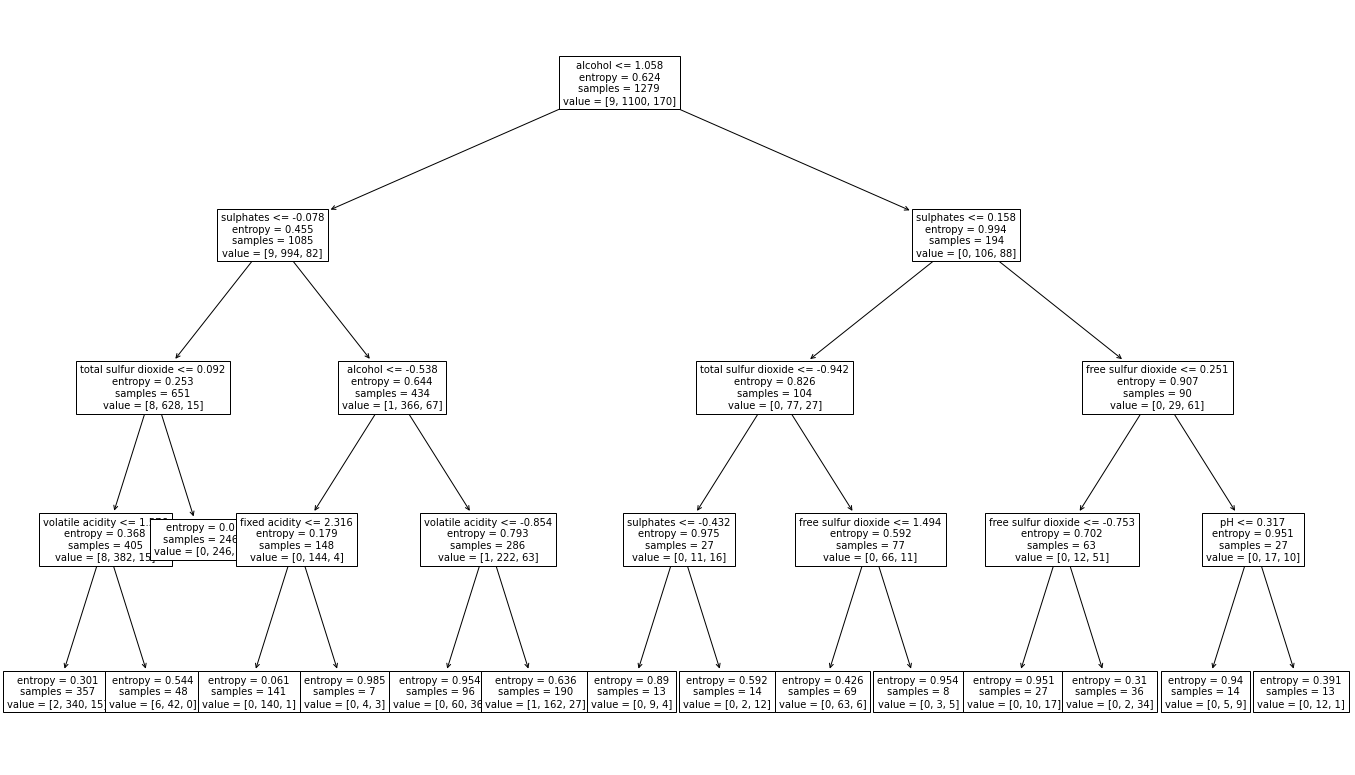

In [ ]:
from sklearn import tree
plt.figure(figsize=(24,14))
tree.plot_tree(wT, feature_names=df.columns[0:11], fontsize=10)
plt.show()

# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
rfc = RandomForestClassifier(max_depth = 4, n_estimators=10)

In [ ]:
trained_model=rfc.fit(X_trainset,y_trainset)

In [ ]:
rfc

RandomForestClassifier(max_depth=4, n_estimators=10)

# Prediction

In [ ]:
prediction = rfc.predict(X_testset)

In [ ]:
print(prediction[0:10])
print(y_testset[0:10])

[1 1 1 1 1 1 1 1 1 1]
147     1
937     1
877     1
1000    2
73      1
31      1
266     1
1403    2
263     1
1491    1
Name: quality, dtype: category
Categories (3, int64): [0 < 1 < 2]


# Finding the accuracy

In [ ]:
rfc.feature_importances_

array([0.0558136 , 0.15174235, 0.08888717, 0.03025825, 0.0379526 ,
       0.04084444, 0.04880813, 0.02147128, 0.06614006, 0.14240228,
       0.31567983])

In [ ]:
print("Accuracy of Random Forest is: ", metrics.accuracy_score(y_testset,prediction))

Accuracy of Random Forest is:  0.8729166666666667
